# Trabalho 2

##### Aluno: Leodécio Braz
##### Ra: 230219

In [1]:
%matplotlib inline
import cv2

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# nome das imagens
name_images = ['baboon','fiducial',
               'monarch','peppers',
               'retina','sonnet','wedge']

# para alterar a imagem basta mudar o indide para algum em names_images
indice = 4
path_image = './images/'+name_images[indice]+'.pgm'

img = cv2.imread(path_image,0)

In [3]:
#máscaras
mask1 = np.array([[6,8,4],
                  [1,0,3],
                  [5,2,7]])

mask2 = np.array([[0,12,3,15],
                  [8,4,11,7],
                  [2,14,1,13],
                  [10,6,9,5]])

mascaras = [('mask1',mask1),('mask2',mask2)]

In [4]:
# Função para salvar as imagens no formato PBM
def save_pbm(path,image):
    cv2.imwrite(path,image,(cv2.IMWRITE_PXM_BINARY, 0))

# Técnica de pontilhado ordenado

### funções auxiliares

In [5]:
# faz um rescale da intensidade dos pixels de uma imagem
def rescale(image,intensity):
    output = intensity*(image/image.max())
    return output

In [6]:
# Atuzaliza os valores para 0 ou 1 da máscara de acordo
## com um valor x de um pixel que representa um limiar 
def update_mask(x,filtro):
    f = np.zeros(filtro.shape)
    for i in range(0,filtro.shape[0]):
        for j in range(0,filtro.shape[1]):
            if x < filtro[i][j]:
                f[i][j] = 0
            else:
                f[i][j] = 1 
    return f

In [7]:
# Atribui o valor da máscara à imagem
def update_image(new_img,i,j,filtro,size):
    new_img[size*i: size*i+(size),size*j: size*j + (size)] = filtro
    return new_img

In [8]:
def pontilhado_ordenado(image,mask,size):
    # Nova imagem que será gerada, seu tamanho é maior que da imagem original
    new = np.zeros((size*image.shape[0] ,size*image.shape[1]))
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            f = update_mask(image[i][j],mask)
            new = update_image(new,i,j,f,size)
    return new

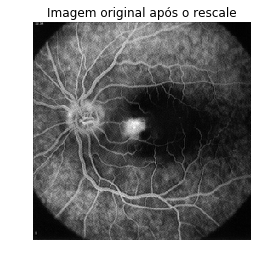

In [9]:
# Máscara que será utilizada
## basta mudar o indice 0 - mask1 ou 1 - mask2
mask = mascaras[0]

#tamanho da máscara
size = mask[1].shape[0]

#faz um rescale da imagem original
img_res = rescale(img , size*size)

plt.axis('off')
plt.title('Imagem original após o rescale')
plt.imshow(img_res,'gray')

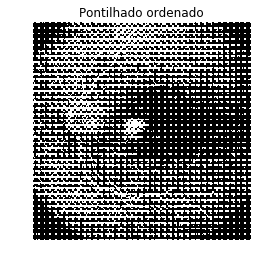

In [10]:
# chama a função para executar o algoritimo de pontilhado ordenado
## passando a imagem após o rescale, a máscara e o tamnanho da máscara
image_pontilhado = pontilhado_ordenado(img_res,mask[1],size)


plt.axis('off')
plt.title('Pontilhado ordenado')
plt.imshow(image_pontilhado,'gray')

save_pbm('./output/'+name_images[indice]+'_PO_'+mask[0]+'.pbm',image_pontilhado)

# pontilhado por difusão de erro

### funções auxiliares

In [11]:
#Função para atribuir o valor de erro
## em um pixel da imagem
def difusao(img,i,j,value,erro):
    try:
        img[i][j] = img[i][j] + value*erro
    except:
        None
    return img

In [12]:
#Varredura da esquerda para a direita
def esquerda_direita(img):
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            err = 0
            
            if(img[i][j]) > 128:
                err = img[i][j] - 255
                img[i][j] = 255
            else:
                err = img[i][j] - 0
                img[i][j] = 0
            
            img = difusao(img,i,j+1,(7/16),err)
            img = difusao(img,i+1,j-1,(3/16),err)
            img = difusao(img,i+1,j,(5/16),err)
            img = difusao(img,i+1,j+1,(1/16),err)
    return img

In [13]:
#Varredura modificando a direção a cada linha
def modificar_direcao(img):
    for i in range(0,img.shape[0]):
        if i % 2 == 0:
            for j in range(0,img.shape[1]):
                err = 0
                if(img[i][j]) > 128:
                    err = img[i][j] - 255
                    img[i][j] = 255
                else:
                    err = img[i][j] - 0
                    img[i][j] = 0
                img = difusao(img,i,j+1,(7/16),err)
                img = difusao(img,i+1,j-1,(3/16),err)
                img = difusao(img,i+1,j,(5/16),err)
                img = difusao(img,i+1,j+1,(1/16),err)
        else:
            for j in range(img.shape[1]-1,-1,-1):
                err = 0
                
                if(img[i][j]) > 128:
                    err = img[i][j] - 255
                    img[i][j] = 255
                else:
                    err = img[i][j] - 0
                    img[i][j] = 0
                img = difusao(img, i,j-1,(7/16),err)
                img = difusao(img, i+1,j-1,(1/16),err)
                img = difusao(img, i+1,j,(5/16),err)
                img = difusao(img, i+1,j+1,(3/16),err)
    return img

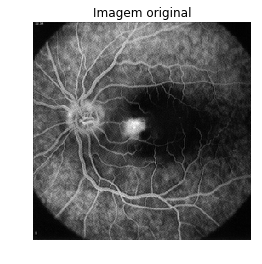

In [14]:
#imagem de entrada
img = cv2.imread(path_image,0)

plt.axis('off')
plt.title('Imagem original')
plt.imshow(img,'gray')

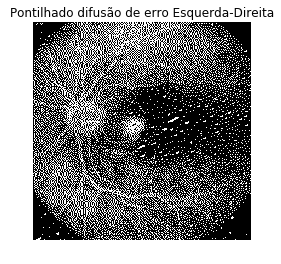

In [15]:
#Chama a função de pontilhado com difusão de erro
## da esquerda para a direita
esq_dir = esquerda_direita(img)

plt.axis('off')
plt.title('Pontilhado difusão de erro Esquerda-Direita')
plt.imshow(esq_dir,'gray')

save_pbm('./output/'+name_images[indice]+'_PDE_ED.pbm',esq_dir)

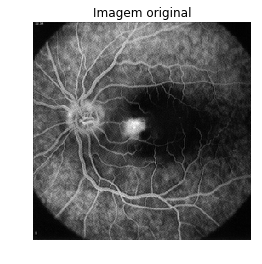

In [16]:
#imagem de entrada
img = cv2.imread(path_image,0)

plt.axis('off')
plt.title('Imagem original')
plt.imshow(img,'gray')

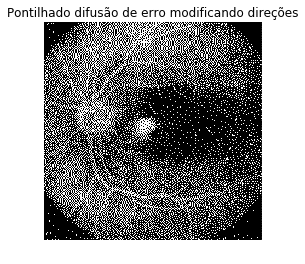

In [17]:
#Chama a função de pontilhado com difusão de erro
## modificando a direção a cada linha
esqdir_and_reverse = modificar_direcao(img)

plt.axis('off')
plt.title('Pontilhado difusão de erro modificando direções')
plt.imshow(esqdir_and_reverse,'gray')

save_pbm('./output/'+name_images[indice]+'_PDE_BD.pbm',esqdir_and_reverse)